In [0]:
#Copying the csv file
fileroot = 'clinicaltrial_2023'
pharmroot = 'pharma'

In [0]:
dbutils.fs.cp('FileStore/tables/' +fileroot + '.zip', 'file:/tmp/')
dbutils.fs.cp('FileStore/tables/' +pharmroot + '.zip', 'file:/tmp/')

True

In [0]:
import os
os.environ['fileroot'] = fileroot
os.environ['pharmroot'] = pharmroot

In [0]:
%sh   #unzipping zipped file
unzip -o -d /tmp /tmp/$fileroot.zip
unzip -o -d /tmp /tmp/$pharmroot.zip

Archive:  /tmp/clinicaltrial_2023.zip
  inflating: /tmp/clinicaltrial_2023.csv  
Archive:  /tmp/pharma.zip
  inflating: /tmp/pharma.csv         


In [0]:
#Making a directory and moving the unzipped file into the directory
dbutils.fs.mkdirs('FileStore/tables/' + fileroot + '.csv')
dbutils.fs.mv('file:/tmp/' + fileroot + '.csv', 'FileStore/tables/' + fileroot + '.csv', True)
dbutils.fs.mkdirs('FileStore/tables/' + pharmroot + '.csv')
dbutils.fs.mv('file:/tmp/' + pharmroot + '.csv', 'FileStore/tables/' + pharmroot + '.csv', True)

True

In [0]:
dbutils.fs.ls('FileStore/tables/'+ fileroot + '.csv')

[FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2023.csv/clinicaltrial_2023.csv', name='clinicaltrial_2023.csv', size=292436366, modificationTime=1714602963000)]

In [0]:
dbutils.fs.ls('FileStore/tables/' + pharmroot + '.csv')

[FileInfo(path='dbfs:/FileStore/tables/pharma.csv/pharma.csv', name='pharma.csv', size=678999, modificationTime=1714602966000)]

In [0]:
dbutils.fs.head('FileStore/tables/clinicaltrial_2023')

[Truncated to first 65536 bytes]


'"Id\tStudy Title\tAcronym\tStatus\tConditions\tInterventions\tSponsor\tCollaborators\tEnrollment\tFunder Type\tType\tStudy Design\tStart\tCompletion",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,\r\n"NCT03630471\tEffectiveness of a Problem-solving Intervention for Common Adolescent Mental Health Problems in India\tPRIDE\tCOMPLETED\tMental Health Issue (E.G.", Depression, Psychosis, Personality Disorder," Substance Abuse)\tBEHAVIORAL: PRIDE \'Step 1\' problem-solving intervention|BEHAVIORAL: Enhanced usual care\tSangath\tHarvard Medical School (HMS and HSDM)|London School of Hygiene and Tropical Medicine\t250.0\tOTHER\tINTERVENTIONAL\tAllocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (INVESTIGATOR"," OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT\t2018-08-20\t2019-02-28",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [0]:
# Reading data from the file 'clinicaltrial_2023'
myrdd1 = sc.textFile('/FileStore/tables/clinicaltrial_2023')
myrdd1.take(2)

['"Id\tStudy Title\tAcronym\tStatus\tConditions\tInterventions\tSponsor\tCollaborators\tEnrollment\tFunder Type\tType\tStudy Design\tStart\tCompletion",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,',
 '"NCT03630471\tEffectiveness of a Problem-solving Intervention for Common Adolescent Mental Health Problems in India\tPRIDE\tCOMPLETED\tMental Health Issue (E.G.", Depression, Psychosis, Personality Disorder," Substance Abuse)\tBEHAVIORAL: PRIDE \'Step 1\' problem-solving intervention|BEHAVIORAL: Enhanced usual care\tSangath\tHarvard Medical School (HMS and HSDM)|London School of Hygiene and Tropical Medicine\t250.0\tOTHER\tINTERVENTIONAL\tAllocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (INVESTIGATOR"," OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT\t2018-08-20\t2019-02-28",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [0]:
# Displaying 3 lines in myrdd1 
myrdd2 = myrdd1.map(lambda line: line)
myrdd2.take(3)

['"Id\tStudy Title\tAcronym\tStatus\tConditions\tInterventions\tSponsor\tCollaborators\tEnrollment\tFunder Type\tType\tStudy Design\tStart\tCompletion",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,',
 '"NCT03630471\tEffectiveness of a Problem-solving Intervention for Common Adolescent Mental Health Problems in India\tPRIDE\tCOMPLETED\tMental Health Issue (E.G.", Depression, Psychosis, Personality Disorder," Substance Abuse)\tBEHAVIORAL: PRIDE \'Step 1\' problem-solving intervention|BEHAVIORAL: Enhanced usual care\tSangath\tHarvard Medical School (HMS and HSDM)|London School of Hygiene and Tropical Medicine\t250.0\tOTHER\tINTERVENTIONAL\tAllocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (INVESTIGATOR"," OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT\t2018-08-20\t2019-02-28",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [0]:
# Splitting each line in myrdd2 by the tab character ('\t') to create a list of elements and retrieving the first 9
myrdd3 = myrdd2.map(lambda line: line.split('\t'))
myrdd3.take(3)

[['"Id',
  'Study Title',
  'Acronym',
  'Status',
  'Conditions',
  'Interventions',
  'Sponsor',
  'Collaborators',
  'Enrollment',
  'Funder Type',
  'Type',
  'Study Design',
  'Start',
  'Completion",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,'],
 ['"NCT03630471',
  'Effectiveness of a Problem-solving Intervention for Common Adolescent Mental Health Problems in India',
  'PRIDE',
  'COMPLETED',
  'Mental Health Issue (E.G.", Depression, Psychosis, Personality Disorder," Substance Abuse)',
  "BEHAVIORAL: PRIDE 'Step 1' problem-solving intervention|BEHAVIORAL: Enhanced usual care",
  'Sangath',
  'Harvard Medical School (HMS and HSDM)|London School of Hygiene and Tropical Medicine',
  '250.0',
  'OTHER',
  'INTERVENTIONAL',
  'Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (INVESTIGATOR"," OUTCOMES_

In [0]:
from datetime import datetime

def format_date(date_str):
    #Formats the given date string to have a day component if it's missing.
    if len(date_str) == 7:
        return date_str + '-01'
    else:
        return date_str

In [0]:
#Calculate the length of the first row in myrdd3
first_row_length = len(myrdd3.first())

#Filter the rdd to retain only rows with the same length as the first row
myrdd_clean = myrdd3.filter(lambda row: len(row) == first_row_length)

In [0]:
#cleaning the 'Completion' column
myrdd4 = myrdd_clean.map(lambda x: (x[3], format_date (x[13].replace(',', '').replace('"', ''))))
myrdd4.take(5)

[('Status', 'Completion'),
 ('COMPLETED', '2019-02-28'),
 ('RECRUITING', '2024-08-01'),
 ('TERMINATED', '2006-05-01'),
 ('RECRUITING', '2023-10-01')]

In [0]:
# Displaying the first few lines of the file 'pharma'
dbutils.fs.head('FileStore/tables/pharma')

[Truncated to first 65536 bytes]


'"Company","Parent_Company","Penalty_Amount","Subtraction_From_Penalty","Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting","Penalty_Year","Penalty_Date","Offense_Group","Primary_Offense","Secondary_Offense","Description","Level_of_Government","Action_Type","Agency","Civil/Criminal","Prosecution_Agreement","Court","Case_ID","Private_Litigation_Case_Title","Lawsuit_Resolution","Facility_State","City","Address","Zip","NAICS_Code","NAICS_Translation","HQ_Country_of_Parent","HQ_State_of_Parent","Ownership_Structure","Parent_Company_Stock_Ticker","Major_Industry_of_Parent","Specific_Industry_of_Parent","Info_Source","Notes"\n"Abbott Laboratories","Abbott Laboratories","$5,475,000","$0","$5,475,000","2013","20131227","government-contracting-related offenses","False Claims Act and related","kickbacks and bribery","Abbott Laboratories agreed to $5.475 million to resolve allegations that it violated the False Claims Act by paying kickbacks to induce doctors to implant the company\'s car

In [0]:
# Reading data from the file 'pharma'
myrdd5 = sc.textFile('/FileStore/tables/pharma')
myrdd5.take(2)

['"Company","Parent_Company","Penalty_Amount","Subtraction_From_Penalty","Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting","Penalty_Year","Penalty_Date","Offense_Group","Primary_Offense","Secondary_Offense","Description","Level_of_Government","Action_Type","Agency","Civil/Criminal","Prosecution_Agreement","Court","Case_ID","Private_Litigation_Case_Title","Lawsuit_Resolution","Facility_State","City","Address","Zip","NAICS_Code","NAICS_Translation","HQ_Country_of_Parent","HQ_State_of_Parent","Ownership_Structure","Parent_Company_Stock_Ticker","Major_Industry_of_Parent","Specific_Industry_of_Parent","Info_Source","Notes"',
 '"Abbott Laboratories","Abbott Laboratories","$5,475,000","$0","$5,475,000","2013","20131227","government-contracting-related offenses","False Claims Act and related","kickbacks and bribery","Abbott Laboratories agreed to $5.475 million to resolve allegations that it violated the False Claims Act by paying kickbacks to induce doctors to implant the company\'s

In [0]:
# Transforming each line in the pharma file ie myrdd5 by double quotes
myrdd6 = myrdd5.map(lambda line: line.replace('"', ''))
myrdd6.take(3)

['Company,Parent_Company,Penalty_Amount,Subtraction_From_Penalty,Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting,Penalty_Year,Penalty_Date,Offense_Group,Primary_Offense,Secondary_Offense,Description,Level_of_Government,Action_Type,Agency,Civil/Criminal,Prosecution_Agreement,Court,Case_ID,Private_Litigation_Case_Title,Lawsuit_Resolution,Facility_State,City,Address,Zip,NAICS_Code,NAICS_Translation,HQ_Country_of_Parent,HQ_State_of_Parent,Ownership_Structure,Parent_Company_Stock_Ticker,Major_Industry_of_Parent,Specific_Industry_of_Parent,Info_Source,Notes',
 "Abbott Laboratories,Abbott Laboratories,$5,475,000,$0,$5,475,000,2013,20131227,government-contracting-related offenses,False Claims Act and related,kickbacks and bribery,Abbott Laboratories agreed to $5.475 million to resolve allegations that it violated the False Claims Act by paying kickbacks to induce doctors to implant the company's carotid, biliary and peripheral vascular products.,federal,agency action,Justice Departme

In [0]:
# Splitting each line in the pharma file by the tab character (',') to create a list of elements and retrieving the first 9
myrdd7 = myrdd6.map(lambda line: line.split(','))
myrdd7.take(2)

[['Company',
  'Parent_Company',
  'Penalty_Amount',
  'Subtraction_From_Penalty',
  'Penalty_Amount_Adjusted_For_Eliminating_Multiple_Counting',
  'Penalty_Year',
  'Penalty_Date',
  'Offense_Group',
  'Primary_Offense',
  'Secondary_Offense',
  'Description',
  'Level_of_Government',
  'Action_Type',
  'Agency',
  'Civil/Criminal',
  'Prosecution_Agreement',
  'Court',
  'Case_ID',
  'Private_Litigation_Case_Title',
  'Lawsuit_Resolution',
  'Facility_State',
  'City',
  'Address',
  'Zip',
  'NAICS_Code',
  'NAICS_Translation',
  'HQ_Country_of_Parent',
  'HQ_State_of_Parent',
  'Ownership_Structure',
  'Parent_Company_Stock_Ticker',
  'Major_Industry_of_Parent',
  'Specific_Industry_of_Parent',
  'Info_Source',
  'Notes'],
 ['Abbott Laboratories',
  'Abbott Laboratories',
  '$5',
  '475',
  '000',
  '$0',
  '$5',
  '475',
  '000',
  '2013',
  '20131227',
  'government-contracting-related offenses',
  'False Claims Act and related',
  'kickbacks and bribery',
  "Abbott Laboratories 

In [0]:
#Extracting the second element(Parent_Company) since its the only column we're interested in
myrdd8 = myrdd7.map(lambda x: x[1])
myrdd8.take(3)

['Parent_Company', 'Abbott Laboratories', 'AbbVie']

#1. Number of Distinct studies

In [0]:
# Assuming header is present in the first element of myrdd3
header = myrdd_clean.first()

# Filter out the header
myrdd_no_header = myrdd_clean.filter(lambda x: x != header)

# Apply the operations on myrdd_no_header
myrdd_total_count = myrdd_no_header.map(lambda x: x[1])
total_count = myrdd_total_count.count()
myrdd9 = myrdd_no_header.map(lambda x: x[1]).distinct()
distinct_count = myrdd9.count()

print('Total number of studies is', total_count)
print('Number of distinct studies is', distinct_count)

Total number of studies is 483420
Number of distinct studies is 481101


In [0]:
# Option 2 to finding the distinct number of studies
myrdd10 = myrdd_clean.map(lambda line: (line[1], 1))
myrdd10.take(3)

[('Study Title', 1),
 ('Effectiveness of a Problem-solving Intervention for Common Adolescent Mental Health Problems in India',
  1),
 ('Oral Ketone Monoester Supplementation and Resting-state Brain Connectivity',
  1)]

In [0]:
header = myrdd10.first()

myrdd_no_header = myrdd10.filter(lambda x: x != header)
#Removes the header
myrdd12 = myrdd_no_header.reduceByKey(lambda a,b:a+b)
#Combining values with the same key using addition for each key
myrdd12.count()

481101

#2.Type of Studies with their frequencies


In [0]:
#Extracting the 11th element(Type), Retrieving the first two values
myrdd13 = myrdd_clean.map(lambda x: x[10], 1)
myrdd13.take(2)

['Type', 'INTERVENTIONAL']

In [0]:
#Finding the 'Type' column index in the first row of the clinical trial 2023 file
myrdd14 = myrdd_clean.first().index('Type')

In [0]:
#Filtering out rows where the length is greater than the index of 'Type' plus one
#Bringing out each row value in the 'Type' column and giving them a frequency of 1
#Removing the head of the column 'Type'
#Extracting 3 elements with their frequencies of the filtered column  
myrdd15 = myrdd_clean.filter(lambda x: len(x) > myrdd14 + 1  ).map(lambda x: (x[myrdd14], 1)).filter(lambda row: row[0] !='Type')
myrdd15.take(3)

[('INTERVENTIONAL', 1), ('INTERVENTIONAL', 1), ('INTERVENTIONAL', 1)]

In [0]:
#Reducing tuples in myrdd15 by key (the 'Type' values) by summing up the frequencies
#Filtering out any tuples where the key is an empty string
myrdd16 = myrdd15.reduceByKey(lambda a,b:a+b).filter(lambda x: x[0] != '')
myrdd16.take(5)

[('INTERVENTIONAL', 371382),
 ('OBSERVATIONAL', 110221),
 ('EXPANDED_ACCESS', 928)]

In [0]:
#Sorting the tuples in myrdd16 by the count(the second element of each tuple) in descending order
myrdd17 = myrdd16.sortBy(lambda x: x[1], ascending=False)
myrdd17.collect()

[('INTERVENTIONAL', 371382),
 ('OBSERVATIONAL', 110221),
 ('EXPANDED_ACCESS', 928)]

#3.Top 5 conditions with their frequencies

In [0]:
#Extracting each elements in the 'Conditions index' to a tuple with a count of 1
myrdd18 = myrdd_clean.map(lambda x: (x[4])).flatMap(lambda x: x.split('|')).map(lambda x: (x, 1))
# Retrieving the first three elements of the RDD myrdd18 for inspection
myrdd18.take(3)

[('Conditions', 1),
 ('Mental Health Issue (E.G.", Depression, Psychosis, Personality Disorder," Substance Abuse)',
  1),
 ('Cerebrovascular Function', 1)]

In [0]:
header = myrdd18.first()
#Removing the header, aggregating the count and sorting results in descending order
myrdd_no_header2 = myrdd18.filter(lambda x: x != header).reduceByKey(lambda a,b:a+b).sortBy(lambda x: x[1], ascending=False)
myrdd_no_header2.take(5)

[('Healthy', 9731),
 ('Breast Cancer', 7502),
 ('Obesity', 6549),
 ('Stroke', 4071),
 ('Hypertension', 4020)]

#4. 10 most common sponsors that are not pharmaceutical companies with the number of trials they have sponsored

In [0]:
#Finding the 'Sponsor' column index in the first row of the clinical trial 2023 file
sponsor1 = myrdd_clean.first().index('Sponsor')
#Bringing out each row value in the 'Sponsor' column
#Removing the head of the column 'Sponsor'
#Obtaining elements from sponsor_rdd that are not present in myrdd7
#Mapping each element to a tuple with a count of 1, then reducing by key to count occurrences
#Sorting results in descending order
sponsor_rdd = myrdd_clean.map(lambda x: x[sponsor1]).filter(lambda x: x != 'Sponsor').subtract(myrdd7.map(lambda x: x[1], )).map(lambda x: (x, 1)).reduceByKey(lambda a,b:a+b).sortBy(lambda x: x[1], ascending=False)
sponsor_rdd.take(10)

[('National Cancer Institute (NCI)', 3410),
 ('Assiut University', 3335),
 ('Cairo University', 3023),
 ('Assistance Publique - Hôpitaux de Paris', 2951),
 ('Mayo Clinic', 2766),
 ('M.D. Anderson Cancer Center', 2702),
 ('Novartis Pharmaceuticals', 2393),
 ('National Institute of Allergy and Infectious Diseases (NIAID)', 2340),
 ('Massachusetts General Hospital', 2263),
 ('National Taiwan University Hospital', 2181)]

#5.Number of completed studies for each month in 2023.

In [0]:
comp_rdd_cleaned = myrdd3.map(lambda x:[s.replace(',','').replace('"', '') for s in x])
comp_rdd_cleaned.take(2)

[['Id',
  'Study Title',
  'Acronym',
  'Status',
  'Conditions',
  'Interventions',
  'Sponsor',
  'Collaborators',
  'Enrollment',
  'Funder Type',
  'Type',
  'Study Design',
  'Start',
  'Completion'],
 ['NCT03630471',
  'Effectiveness of a Problem-solving Intervention for Common Adolescent Mental Health Problems in India',
  'PRIDE',
  'COMPLETED',
  'Mental Health Issue (E.G. Depression Psychosis Personality Disorder Substance Abuse)',
  "BEHAVIORAL: PRIDE 'Step 1' problem-solving intervention|BEHAVIORAL: Enhanced usual care",
  'Sangath',
  'Harvard Medical School (HMS and HSDM)|London School of Hygiene and Tropical Medicine',
  '250.0',
  'OTHER',
  'INTERVENTIONAL',
  'Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (INVESTIGATOR OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT',
  '2018-08-20',
  '2019-02-28']]

In [0]:
#Obtaining the index of both columns from clinicaltrial2023
q1 = comp_rdd_cleaned.first().index('Completion')
q2 = comp_rdd_cleaned.first().index('Status')

In [0]:
#mapping the RDD containing the formatted date (using format_date function) and the value at index 'Completion' and 'Status'
myrdd26 = comp_rdd_cleaned.filter(lambda x: len(x) > myrdd14 + 1  ).map(lambda x: (format_date (x[q1]), x[q2]))
myrdd26.take(3)

[('Completion', 'Status'),
 ('2019-02-28', 'COMPLETED'),
 ('2024-08-01', 'RECRUITING')]

In [0]:
#Filtering out the date which each study has been completed
myrdd27 = myrdd26.filter(lambda x: x[0] != 'Completion').filter(lambda x: x[1] == 'COMPLETED') or filter(lambda x: x[1] == 'Completed')
myrdd27.take(4)

[('2019-02-28', 'COMPLETED'),
 ('2016-05-01', 'COMPLETED'),
 ('2012-08-01', 'COMPLETED'),
 ('2016-06-07', 'COMPLETED')]

In [0]:
#Mapping out the month and year from the date
myrdd28 = myrdd27.map(lambda x: (x[0][5:7], x[0][0:4]))
myrdd28.take(3)

[('02', '2019'), ('05', '2016'), ('08', '2012')]

In [0]:
#Filtering out the months for which 2023 is the completed year
#Counting the number of completed studies in 2023 by mapping each element to a tuple with a count of 1
#Reducing by key to sum up the counts for each study
comp_stud_2023 = myrdd28.filter(lambda x: x[1] == '2023').map(lambda x: (x[0], 1)).reduceByKey(lambda a,b:a+b)
comp_stud_2023.take(4)

[('06', 1619), ('01', 1494), ('08', 1230), ('12', 1082)]

In [0]:
#Dictionary mapping numerical representations of months to their corresponding names in words
Months_in_words = {'01':'Jan', '02':'Feb', '03':'Mar', '04':'Apr', '05':'May', '06':'Jun', '07':'Jul', '08':'Aug', '09':'Sep', '10':'Oct', '11':'Nov', '12':'Dec'}

In [0]:
#Modified answer with Month in words instead of numbers
rev_comp_stud_2023 = comp_stud_2023.map(lambda x: (Months_in_words [x[0]], x[1]))
rev_comp_stud_2023.take(12)

[('Jun', 1619),
 ('Jan', 1494),
 ('Aug', 1230),
 ('Dec', 1082),
 ('Oct', 1058),
 ('Mar', 1552),
 ('Feb', 1272),
 ('May', 1415),
 ('Apr', 1324),
 ('Jul', 1360),
 ('Nov', 909),
 ('Sep', 1152)]

In [0]:
import matplotlib.pyplot as plt
#Taking the elements of comp_stud_2023
comp_stud_2023_vis = comp_stud_2023.collect()
#Extracting months and counts
months = [month for month, _ in comp_stud_2023_vis]
counts = [count for _, count in comp_stud_2023_vis]

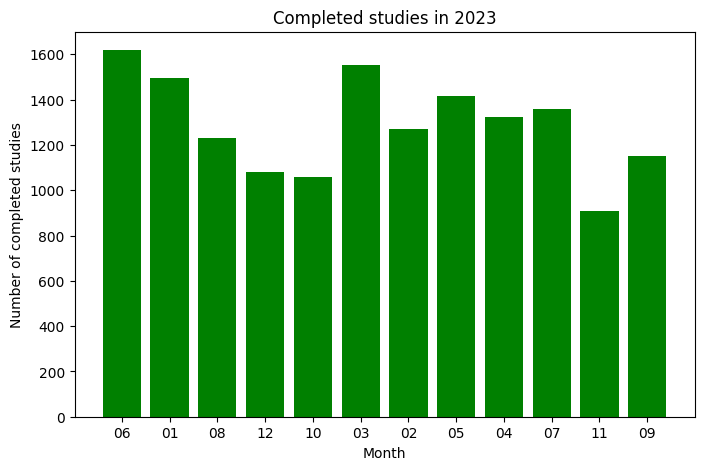

In [0]:
plt.figure(figsize=(8, 5))
plt.bar(months, counts, color='green')
plt.xlabel('Month')
plt.ylabel('Number of completed studies')
plt.title('Completed studies in 2023')
plt.show()

#Extra analysis; Number of enrollment by type for 2023

In [0]:
# Extract enrollment numbers, type of enrollment and start dates
enrollment_dates = myrdd_clean.map(lambda x: (x[12], (x[10]),(x[8])))

enrollment_dates.take(3)

[('Start', 'Type', 'Enrollment'),
 ('2018-08-20', 'INTERVENTIONAL', '250.0'),
 ('2023-10-25', 'INTERVENTIONAL', '30.0')]

In [0]:
# Convert start dates to year format
enrollment_by_month = enrollment_dates.map(lambda x:(x[0][0:4], x[1], x[2])).filter(lambda x:x[0] == '2023')
enrollment_by_month.take(3)

[('2023', 'INTERVENTIONAL', '30.0'),
 ('2023', 'INTERVENTIONAL', '108.0'),
 ('2023', 'INTERVENTIONAL', '76.0')]

In [0]:
# Map each entry to a tuple containing the study type and enrollment number
enrollment_by_type = enrollment_by_month.map(lambda x: (x[1], float(x[2])))

# Reduce by key to aggregate the enrollment numbers for each study type
enrollment_by_type = enrollment_by_type.reduceByKey(lambda a, b: a + b).sortByKey()

# Collect the results
enrollment_by_type.collect()

[('INTERVENTIONAL', 24548076.0), ('OBSERVATIONAL', 108117288.0)]